In [71]:
%display latex
load('../etala_utilities.sage')

### ETALA lesson 13
# Group Assignment
Monday May 10
* __Lecture on chapters__
    * 7.1 Diagonalization of Symmetric Matrices
    * 7.2 Quadratic Forms
    * 7.3 Constrained Optimization
* __Problems__
    * 7.1: 1-10, 13, 23, 25, 29
    * 7.2: 2, 5, 7, 9, 21
    * 7.3: 1, 3, 7, 9, 11
    * Problem 4 in the 2018 summer exam




## Chapter 7.1

### Problem 1-6
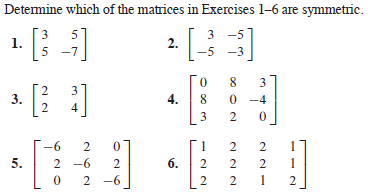

 1. __True__
 2. __True__
 3. __False__ (1,2) != (2, 1)
 4. __False__ (3,2) != (2, 3)
 5. __True__
 6. __False__ Not a quadratic matrix

### Problem 7-10
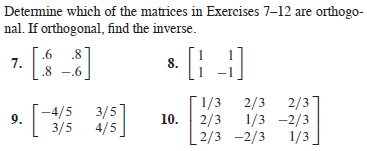

by Theorem 6 in chapter 6, an orthogonal matrix $P$ must fulfill the equation $ P^TP = I $.

In [3]:
for matrix, i in zip((Matrix([[.6, .8], [.8, -.6]]), 
                      Matrix([[1, 1], [1, -1]]), 
                      Matrix([[-4, 3], [3, 4]])/5, 
                      Matrix([[1, 2, 2], [2, 1, -2], [2, -2, 1]])/3),
                     range(7,11)):
    PTP = matrix.transpose()*matrix
    orthogonal = PTP == Matrix.identity(matrix.nrows())
    show(f'{i}) The matrix P = ', matrix, 
         f" is {'' if orthogonal else 'not '}orthogonal since ", 
         PTP, f" {'==' if orthogonal else '!='} I")


'7) The matrix P = ' [ 0.600000000000000  0.800000000000000]
[ 0.800000000000000 -0.600000000000000] ' is orthogonal since ' [ 1.00000000000000 0.000000000000000]
[0.000000000000000  1.00000000000000] ' == I'

'8) The matrix P = ' [ 1  1]
[ 1 -1] ' is not orthogonal since ' [2 0]
[0 2] ' != I'

'9) The matrix P = ' [-4/5  3/5]
[ 3/5  4/5] ' is orthogonal since ' [1 0]
[0 1] ' == I'

'10) The matrix P = ' [ 1/3  2/3  2/3]
[ 2/3  1/3 -2/3]
[ 2/3 -2/3  1/3] ' is orthogonal since ' [1 0 0]
[0 1 0]
[0 0 1] ' == I'

### Problem 13
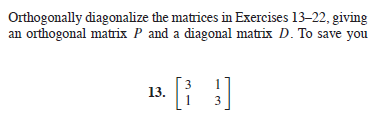

This is done by finding the eigen values $\lambda_1, \lambda_2$ (2 counting multiplicities by theorem 3.a) and their corresponding eigen vectors $\boldsymbol u_1, \boldsymbol u_2$. These can then be used to construct $P = \begin{bmatrix}\boldsymbol u_1 & \boldsymbol u_2 \end{bmatrix} $ and $D = \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} $

In [4]:
A = Matrix([[3, 1], [1, 3]])
eigens = A.eigenvectors_right()  # returbs tuples of (lambda, u, multiplicity)
P = Matrix([eigen[1][0] for eigen in eigens]); show_var()
D = Matrix.diagonal([eigen[0] for eigen in eigens]); show_var()

\text{P} = \left(\begin{array}{rr}
1 & 1 \\
1 & -1
\end{array}\right)

\text{D} = \left(\begin{array}{rr}
4 & 0 \\
0 & 2
\end{array}\right)

### Problem 23
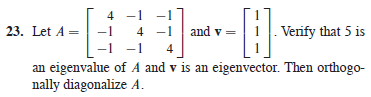

To check that $\boldsymbol v$ is an eigenvector of A and to find the corresponding eigenvalue $\lambda$ solve the equation  
$$A \boldsymbol v = \lambda \boldsymbol v $$

In [5]:
A = Matrix.ones(3,3)*-1 + 5; show_var()
v = vector([1,1,1]); show_var()
lambda_ = (A*v)/v; show_var()

\text{A} = \left(\begin{array}{rrr}
4 & -1 & -1 \\
-1 & 4 & -1 \\
-1 & -1 & 4
\end{array}\right)

\text{v} = \left(1,\,1,\,1\right)

\text{lambda_} = 2

Now since the above equation has a solution, $\boldsymbol v$ is indeed an eigenvector of A with an eigenvalue of 2.  
To check if 5 is a valid eigenvalue, the equation $(A - 5I)\boldsymbol x = 0$ is solved. Since the complete set of solutions to the equation is the null space of $(A - 5I)$, the left_kernel() command is used, which returns a basis for the null space.

In [6]:
NullA = (A-5).left_kernel(); show_var()  # A-5 is a shorthand for A-5*Matrix.identity(A.nrows())

\text{NullA} = \mathrm{RowSpan}_{\Bold{Z}}\left(\begin{array}{rrr}
1 & 0 & -1 \\
0 & 1 & -1
\end{array}\right)

since $\boldsymbol v$ and the basis vectors for the null space are eigenvectors for two seperate eigen values, by theorem 3.c, $\boldsymbol v$ is orhtogonal to $\text{Null }A$. Therefore all that is needed to transform the current eigenvectors into an orthonomal set as needed for the $P$ matrix, is to use the gram-schmidt method on the basis vectors for $\text{Null }A$, and then normalize the set of $\boldsymbol v$ and $\text{Null }A$
Note here that the normalization part isn't necessary.

To construct the D matrix, simply create a diagonal matrix from the eigen values:

In [7]:
D = Matrix.diagonal([2, 5, 5]); show_var()

\text{D} = \left(\begin{array}{rrr}
2 & 0 & 0 \\
0 & 5 & 0 \\
0 & 0 & 5
\end{array}\right)

In [8]:
u_1 = v
u_2 = NullA.basis()[0]
u_3 = NullA.basis()[1]
# orthogonalize using the gram-schmidth method
for u in (u_1, u_2):
    u_3 = u_3 - u_3.inner_product(u)/u.inner_product(u) * u
P = Matrix.column(SR,[u_1, u_2, u_3]); show_var()
for j in range(P.ncols()):
    c = P.column(j)
    if c.norm() != 0 :
        P[:,j] = c/c.norm()
show_var('P')
A*P == P*D

\text{P} = \left(\begin{array}{rrr}
1 & 1 & -\frac{1}{2} \\
1 & 0 & 1 \\
1 & -1 & -\frac{1}{2}
\end{array}\right)

\text{P} = \left(\begin{array}{rrr}
\frac{1}{3} \, \sqrt{3} & \frac{1}{2} \, \sqrt{2} & -\frac{1}{3} \, \sqrt{\frac{3}{2}} \\
\frac{1}{3} \, \sqrt{3} & 0 & \frac{2}{3} \, \sqrt{\frac{3}{2}} \\
\frac{1}{3} \, \sqrt{3} & -\frac{1}{2} \, \sqrt{2} & -\frac{1}{3} \, \sqrt{\frac{3}{2}}
\end{array}\right) \sim \left(\begin{array}{rrr}
0.577 & 0.707 & -0.408 \\
0.577 & 0.000 & 0.817 \\
0.577 & -0.707 & -0.408
\end{array}\right)

True

above is an alternative solution which doesn't normalize P

In [9]:
u_1 = v.normalized()
u_2 = NullA.basis()[0].normalized()
u_3 = NullA.basis()[1].change_ring(SR)  # this is necessary as the normalizations above change the vectors to the symbolic ring to avoid numerical erros
# orthogonalize using the gram-schmidth method
for u in (u_1, u_2):
    u_3 = u_3 - u_3.dot_product(u) * u
u_3 = u_3.normalized()
P = Matrix.column([u_1, u_2, u_3]); show_var()

\text{P} = \left(\begin{array}{rrr}
\frac{1}{3} \, \sqrt{3} & \frac{1}{2} \, \sqrt{2} & -\frac{1}{3} \, \sqrt{\frac{3}{2}} \\
\frac{1}{3} \, \sqrt{3} & 0 & \frac{2}{3} \, \sqrt{\frac{3}{2}} \\
\frac{1}{3} \, \sqrt{3} & -\frac{1}{2} \, \sqrt{2} & -\frac{1}{3} \, \sqrt{\frac{3}{2}}
\end{array}\right) \sim \left(\begin{array}{rrr}
0.577 & 0.707 & -0.408 \\
0.577 & 0.000 & 0.817 \\
0.577 & -0.707 & -0.408
\end{array}\right)

And verifying the result:

In [10]:
A*P == P*D

True

### Problem 25
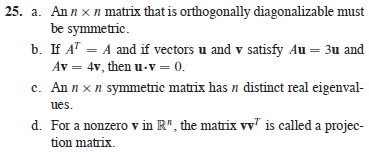

a. __True__ - by chapter 7 theorem 2  
b. __True__ - by chapter 7 theorem 3.c  
c. __False__ - An $n \times n$ matrix has n eigenvalues counting multiplicities (meaning they are not necessarily distinct)  
d. __False__ - This is only true if $\boldsymbol v$ is a unit vector  

### Problem 29
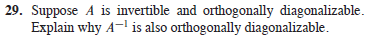

## Chapter 7.2

### Problem 2
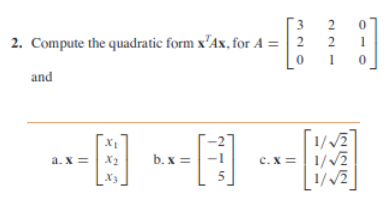

In [11]:
var('x_1, x_2, x_3')
A = Matrix(SR, 3, 3, [3, 2, 0, 2, 2, 1, 0, 1, 0]); show_var()
x_a = vector(SR, [x_1, x_2, x_3]); show_var()
x_b = vector(SR, [-2, -1, 5]); show_var()
x_c = vector(SR, [1/sqrt(2), 1/sqrt(2), 1/sqrt(2)]); show_var()

def Q(x):
    return x.row() * A * x

Q_x_a, Q_x_b, Q_x_c = (Q(x) for x in (x_a, x_b, x_c)); show_var()

\text{A} = \left(\begin{array}{rrr}
3 & 2 & 0 \\
2 & 2 & 1 \\
0 & 1 & 0
\end{array}\right)

\text{x_a} = \left(x_{1},\,x_{2},\,x_{3}\right)

\text{x_b} = \left(-2,\,-1,\,5\right)

\text{x_c} = \left(\frac{1}{2} \, \sqrt{2},\,\frac{1}{2} \, \sqrt{2},\,\frac{1}{2} \, \sqrt{2}\right) \sim \left(0.707,\,0.707,\,0.707\right)

\text{Q_x_a} = \left({\left(3 \, x_{1} + 2 \, x_{2}\right)} x_{1} + {\left(2 \, x_{1} + 2 \, x_{2} + x_{3}\right)} x_{2} + x_{2} x_{3}\right)

\text{Q_x_b} = \left(12\right)

\text{Q_x_c} = \left(\frac{11}{2}\right)

### Problem 5
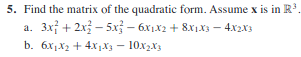

Here the matrix of the quadratic form is constructed using the fact that the factors of the squares are located along the diagonal, and half the factors of the cross products are located in the relevant cell of the upper and lower triangles (i.e. $A_{ij} = A_{ji} = \frac{c}{2}$ where $c$ is the factor of the cross product $x_ix_j$ in the quadratic form $\boldsymbol x^TA \boldsymbol x$).  
$$ A_a = \begin{bmatrix} 3 & -3 & 4 \\ -3 & 2 & -2 \\ 4 & -2 & -5 \end{bmatrix} $$  
$$ A_b = \begin{bmatrix} 0 & 3 & 2 \\ 3 & 0 & -5 \\ 2 & -5 & 0 \end{bmatrix} $$  

### Problem 7
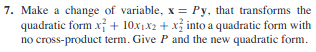

In [12]:
# First construct the matrix A of the quadratic form
A = Matrix(SR, 2, 2, [1, 5, 5, 1]); show_var()
# Then diagonalize A to find the matrix D of the new quadratic form, and the transform P
D = Matrix.diagonal(A.eigenvalues()); show_var()
P = Matrix.column([ev[1][0] for ev in A.eigenvectors_right()]); show_var()
# Now calculate the expression for the quadratic form:
var('y_1, y_2')
y = vector(SR, [x_1, x_2])
Q_y = y.row()*D*y; show_var()

\text{A} = \left(\begin{array}{rr}
1 & 5 \\
5 & 1
\end{array}\right)

\text{D} = \left(\begin{array}{rr}
6 & 0 \\
0 & -4
\end{array}\right)

\text{P} = \left(\begin{array}{rr}
1 & 1 \\
1 & -1
\end{array}\right)

\text{Q_y} = \left(6 \, x_{1}^{2} - 4 \, x_{2}^{2}\right)

### Problem 9
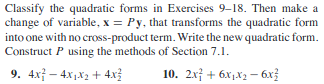

In [9]:
from itertools import chain
## compute the eigenvalues to be able to classify the quadratic form:
A = Matrix(SR, 2, 2, [4, -2, -2, 4]); show_var()
eigens = A.eigenvectors_right()
eigen_values, eigen_vectors, multiplicities = zip(*eigens); show_var(approx=False)
# since all the eigenvalues are positive, the quadratic form is positive definite
# All eigenvalues also have multiplity of one, meaning that the eigenvectors are othogonal
D = Matrix.diagonal(eigen_values)
P = Matrix.column(chain(*eigen_vectors)); show_var()
var('y_1, y_2')
y = vector(SR, [y_1, y_2])
Q_y = y.row()*D*y; show_var()

\text{A} = \left(\begin{array}{rr}
4 & -2 \\
-2 & 4
\end{array}\right)

\text{eigen_values} = \left(6, 2\right)

\text{eigen_vectors} = \left(\left[\left(1,\,-1\right)\right], \left[\left(1,\,1\right)\right]\right)

\text{multiplicities} = \left(1, 1\right)

\text{P} = \left(\begin{array}{rr}
1 & 1 \\
-1 & 1
\end{array}\right)

\text{Q_y} = \left(6 \, y_{1}^{2} + 2 \, y_{2}^{2}\right)

### Problem 21
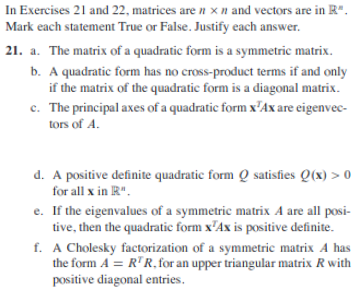

a. __True__, by definition  
b. __True__, since the value of each cell in the matrix maps to the factors of the terms in the quadratic form following the pattern $Q(\boldsymbol x) = \boldsymbol x^T A \boldsymbol x = \sum{A_{ij} x_i x_j}$, and so any non zero cell off the diagonal will introduce a cross product term since $i \ne j$  
c. __True__, see chapter 5 theorem 5  
d. __False__, only for $\boldsymbol x \ne 0$  
e. __True__, by chapter 7 theorem 5.a  
f. __True__, see numerical note after chapter 7 example 6  

## Chapter 7.3


### Problem 1
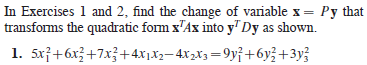

In [55]:
A = Matrix(SR,[[5,2,0],[2,6,-2],[0,-2,7]]); show_var()
D = Matrix.diagonal(SR, [9, 6, 3]); show_var()
# Checking that the diagonals of D are indeed eigenvalues to A, the corresponding eigenvectors are used to construct P
eigen_values, eigen_vectors, multiplicities = zip(*A.eigenvectors_left()); show_var('eigen_values')
# Normalize vectors
eigen_vectors = [ev[0].normalized() for ev in eigen_vectors]; show_var()
# Construct matrix from eigenvectors according to the order from D
# Looking at the resulting matrix, the signs are wrong, and the last column needs inverting
P = Matrix.column([eigen_vectors[1], eigen_vectors[2], -1*eigen_vectors[0]]); show_var()  
# Then verify the result:
var("x_1, x_2, x_3")
x = vector([x_1, x_2, x_3])
x.row() * A * x == (P*x).row() * D * P*x

\text{A} = \left(\begin{array}{rrr}
5 & 2 & 0 \\
2 & 6 & -2 \\
0 & -2 & 7
\end{array}\right)

\text{D} = \left(\begin{array}{rrr}
9 & 0 & 0 \\
0 & 6 & 0 \\
0 & 0 & 3
\end{array}\right)

\text{eigen_values} = \left(3, 9, 6\right)

\text{eigen_vectors} = \left[\left(\frac{2}{3},\,-\frac{2}{3},\,-\frac{1}{3}\right), \left(\frac{1}{3},\,\frac{2}{3},\,-\frac{2}{3}\right), \left(\frac{2}{3},\,\frac{1}{3},\,\frac{2}{3}\right)\right]

\text{P} = \left(\begin{array}{rrr}
\frac{1}{3} & \frac{2}{3} & -\frac{2}{3} \\
\frac{2}{3} & \frac{1}{3} & \frac{2}{3} \\
-\frac{2}{3} & \frac{2}{3} & \frac{1}{3}
\end{array}\right)

True

### Problem 3
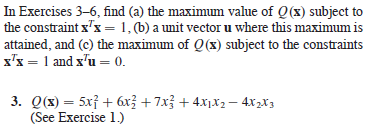

#### a)
By theorem 6 of chapter 7, the maximum and minimum values of the quadratic form $Q(\boldsymbol x)$ correspond to the largest and smallest eigenvalue of $A$, thus:

In [57]:
max_Q = max(eigen_values); show_var()

\text{max_Q} = 9

#### b)
By the same theorem the $Q(\boldsymbol x)$ will take this value when $\boldsymbol x$ is a unit eigenvector corresponding to said eigenvalue

In [58]:
x_max_Q = eigen_vectors[eigen_values.index(max_Q)]; show_var()

\text{x_max_Q} = \left(\frac{1}{3},\,\frac{2}{3},\,-\frac{2}{3}\right)

#### C)
By theorem 7 of chapter 7, becomes the second greatest eigenvalue when the constraint $\boldsymbol x^T \boldsymbol u_1 = 0$ is added

In [60]:
x_max_Q = eigen_vectors[eigen_values.index(6)]; show_var()

\text{x_max_Q} = \left(\frac{2}{3},\,\frac{1}{3},\,\frac{2}{3}\right)

### Problem 7
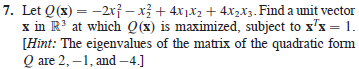

By theorem 6 this will be the normalized eigenvector corresponding to the largest of the given eigenvalues

In [68]:
A = Matrix(SR, 3, 3, [-2, 2, 0, 2, -1, 2, 0, 2, 0]); show_var()
eigen_values, eigen_vectors, multiplicities = zip(*A.eigenvectors_left()); show_var()
x_max_Q = eigen_vectors[eigen_values.index(max(eigen_values))][0].normalized(); show_var()

\text{A} = \left(\begin{array}{rrr}
-2 & 2 & 0 \\
2 & -1 & 2 \\
0 & 2 & 0
\end{array}\right)

\text{eigen_values} = \left(2, -1, -4\right)

\text{eigen_vectors} = \left(\left[\left(1,\,2,\,2\right)\right], \left[\left(1,\,\frac{1}{2},\,-1\right)\right], \left[\left(1,\,-1,\,\frac{1}{2}\right)\right]\right)

\text{multiplicities} = \left(1, 1, 1\right)

\text{x_max_Q} = \left(\frac{1}{3},\,\frac{2}{3},\,\frac{2}{3}\right)

### Problem 9
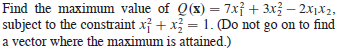

Since $\boldsymbol x$ is a vector in $\Bbb R^2$ the constraint $x_1^2 + x_2^2 = 1$ is equivalent to $\boldsymbol x^T \boldsymbol x$, and theorem 6 can be used

In [70]:
A = Matrix(SR, 2, 2, [7, -1, -1, 3]); show_var()
eigen_values = A.eigenvalues(); show_var()
max_Q = max(eigen_values); show_var()

\text{A} = \left(\begin{array}{rr}
7 & -1 \\
-1 & 3
\end{array}\right)

\text{eigen_values} = \left[-\sqrt{5} + 5, \sqrt{5} + 5\right] \sim 2.76 + 7.24i

\text{max_Q} = \sqrt{5} + 5 \sim 7.24

### Problem 11
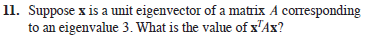